In [11]:
import pandas as pd 
import numpy as np
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns

Bring in the wrangled data

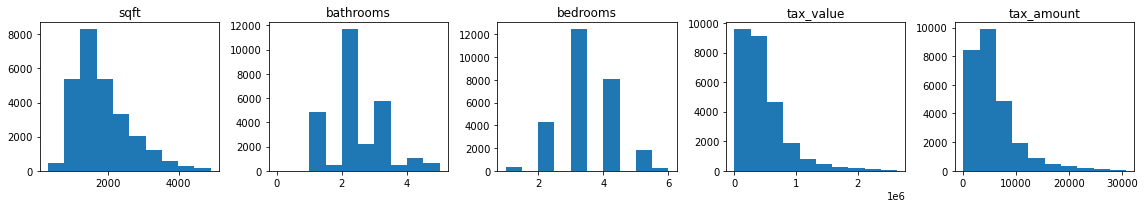

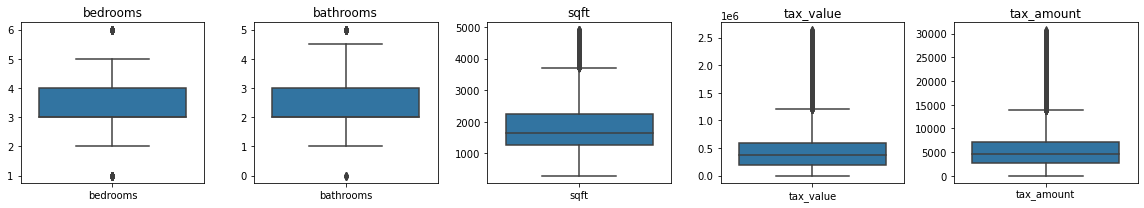

In [12]:
train, validate, test = wrangle.wrangle_zillow()

Wrangle_zillow gives us a quick look at distibutions

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15189 entries, 10876414 to 14264405
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sqft        15189 non-null  int64  
 1   bathrooms   15189 non-null  float64
 2   bedrooms    15189 non-null  int64  
 3   has_pool    15189 non-null  int64  
 4   tax_value   15189 non-null  int64  
 5   year_built  15189 non-null  object 
 6   tax_amount  15189 non-null  float64
 7   fips        15189 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 1.0+ MB


In [14]:
train.isnull().sum()

sqft          0
bathrooms     0
bedrooms      0
has_pool      0
tax_value     0
year_built    0
tax_amount    0
fips          0
dtype: int64

We have taken care of all null values via the wrangle_zillow dropping all null values. We replaced all null values in has_pool with 0. This lines up with about a quarter of southern california houses having a pool. 

Originially I was also looking at fireplaces and garages as well but the data wasnt there to support them 

In [15]:
train.fips.value_counts()

6037.0    9653
6059.0    4200
6111.0    1336
Name: fips, dtype: int64

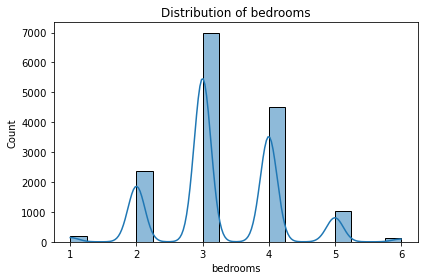

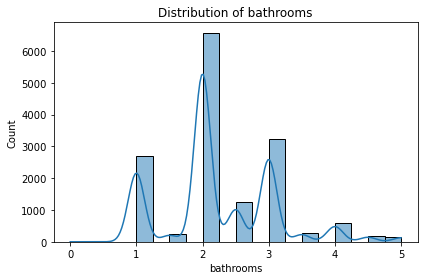

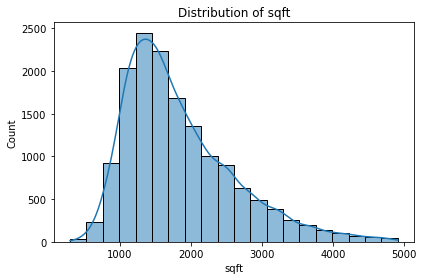

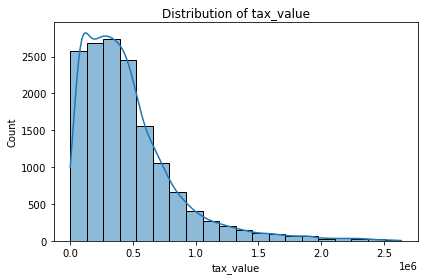

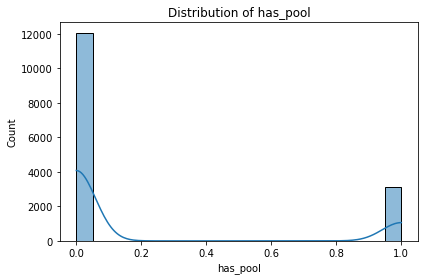

In [16]:
#checking distributions of our selected features/univariate exploration
for x in train[['bedrooms','bathrooms','sqft','tax_value','has_pool']]:
    sns.histplot(train[x], bins = 20, kde = True)
    plt.title(f'Distribution of {x}')
    plt.tight_layout()
    plt.show()

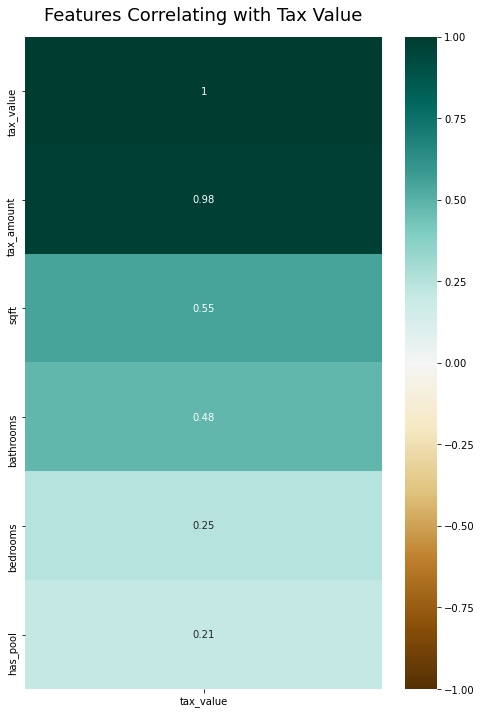

In [24]:

# Make a heatmap that shows correlation of churn and other variables
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Tax Value', fontdict={'fontsize':18}, pad=16);


The tax amount is directly tied to the tax value will have to drop it. 
Looks like everything else is a correlatiing factor to price


In [27]:
# make dictionary with fips values and county names
counties = {6037: 'LA', 6059: 'Orange', 6111: 'Ventura'}

# use .replace to create an new column called county
train['county'] = train.fips.replace(counties)

In [28]:
train.head()

,sqft,bathrooms,bedrooms,has_pool,tax_value,year_built,tax_amount,fips,county
parcel_id,,,,,,,,,
10876414,1044,2.0,3,0,394222,1954.0,4894.00,6037.0,LA
12528247,2358,2.0,4,0,1326298,1929.0,15625.69,6037.0,LA
11740891,2060,1.0,3,0,378901,1924.0,4663.60,6037.0,LA
11211538,1946,3.0,4,1,254400,1990.0,3904.99,6037.0,LA
14076657,1439,2.0,3,0,63641,1971.0,1020.36,6059.0,Orange


In [31]:
train['tax_rate'] = train.tax_amount / train.tax_value

In [32]:
train.head()

,sqft,bathrooms,bedrooms,has_pool,tax_value,year_built,tax_amount,fips,county,tax_rate
parcel_id,,,,,,,,,,
10876414,1044,2.0,3,0,394222,1954.0,4894.00,6037.0,LA,0.012414
12528247,2358,2.0,4,0,1326298,1929.0,15625.69,6037.0,LA,0.011781
11740891,2060,1.0,3,0,378901,1924.0,4663.60,6037.0,LA,0.012308
11211538,1946,3.0,4,1,254400,1990.0,3904.99,6037.0,LA,0.015350
14076657,1439,2.0,3,0,63641,1971.0,1020.36,6059.0,Orange,0.016033


In [ ]:
def my_scaler(train, validate, test, col_names, scaler, scaler_name):
    
    '''
    This function takes in the train validate and test dataframes, columns you want to scale (as a list), a scaler (i.e. MinMaxScaler(), with whatever paramaters you need),
    scaler_name as a string.
    col_names: list of columns to scale
    Scaler_name, should be what you want in the name of your new dataframe columns.
    Adds columns to the train validate and test dataframes. 
    Outputs scaler for doing inverse transforms.
    Ouputs a list of the new column names (what you can use to create the X_train).
    
    example: min_max_scaler, scaled_cols_list = my_scaler(train, validate, test, MinMaxScaler(), 'scaled_min_max')
    
    '''
    
    #create the scaler (input here should be minmax scaler)
    mm_scaler = scaler
    
    # make empty list for return
    scaled_cols_list = []
    
    # loop through columns in col names
    for col in col_names:
        
        #fit and transform to train, add to new column on train df
        train[f'{col}_{scaler_name}'] = mm_scaler.fit_transform(train[[col]]) 
        
        #df['col'].values.reshape(-1, 1)
        
        #transform cols from validate and test (only fit on train)
        validate[f'{col}_{scaler_name}']= mm_scaler.transform(validate[[col]])
        test[f'{col}_{scaler_name}']= mm_scaler.transform(test[[col]])
        
        #add new column name to the list that will get returned
        scaled_cols_list.append(f'{col}_{scaler_name}')
    
    #confirmation print
    print('Your scaled columns have been added to your train validate and test dataframes.')
    
    #returns scaler, and a list of column names that can be used in X_train, X_validate and X_test.
    return scaler, scaled_cols_list   
